# Tratamento dos dados para lidar com dados NaN's

## TL;DR

nesse notebook estudamos quais os métodos existentes que podemos usar para tratar com os dados faltantes

## Objetivo

estudar como a forma como tratamos os dados faltantes afeta na aplicação dos métodos de clusterização

## Dados

CSV's




# Tratamento do tamanho das séries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../../data/rafaelDB.csv')

### Plot dos dados

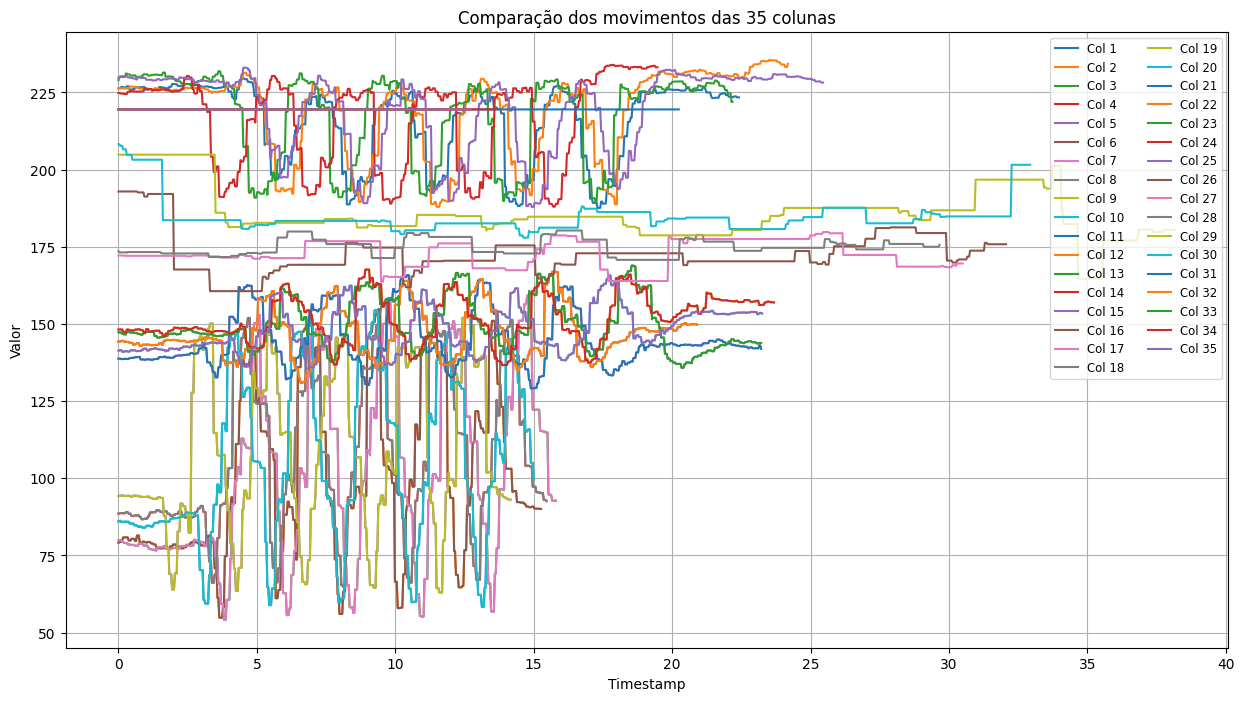

In [3]:
# Visualização dos dados.
# Suponha que df é seu DataFrame e a coluna 0 é timestamp
timestamp = df.iloc[:, 0]

plt.figure(figsize=(15, 8))

# Plota as colunas 1 a 35
for i in range(1, 36):
    plt.plot(timestamp, df.iloc[:, i], label=f'Col {i}')

plt.xlabel('Timestamp')
plt.ylabel('Valor')
plt.title('Comparação dos movimentos das 35 colunas')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.show()

### Tratamento dos tamanhos das séries


In [4]:
df

,timestamp,Vol1Ex1,Vol1Ex2,Vol1Ex3,Vol1Ex4,Vol1Ex5,Vol2Ex1,Vol2Ex2,Vol2Ex3,Vol2Ex4,...,Vol6Ex1,Vol6Ex2,Vol6Ex3,Vol6Ex4,Vol6Ex5,Vol7Ex1,Vol7Ex2,Vol7Ex3,Vol7Ex4,Vol7Ex5
0,0.0000,86.05160,79.04637,79.92158,88.55168,94.18597,144.2986,138.7671,147.3392,148.2097,...,192.9248,172.1902,173.6004,204.8451,208.2256,219.5107,219.5107,219.5107,219.5107,219.5107
1,0.0334,86.05160,79.42403,79.92158,88.55168,94.36861,144.2986,138.7671,147.2379,148.2097,...,192.9248,172.1767,173.1956,204.8451,208.2256,219.5107,219.5107,219.5107,219.5107,219.5107
2,0.0668,86.24536,79.42403,79.92158,88.72372,94.36861,144.2986,138.7671,147.2379,148.2097,...,192.9248,172.1767,173.1956,204.8451,207.7024,219.5107,219.5107,219.5107,219.5107,219.5107
3,0.1002,85.88944,79.42403,79.92158,88.72372,94.36861,144.4738,138.6201,147.2379,148.2097,...,192.9248,172.1767,173.1956,204.8451,207.7024,219.5107,219.5107,219.5107,219.5107,219.5107
4,0.1336,85.88944,79.89925,79.41667,88.72372,94.40106,144.5396,138.6201,146.8200,148.2097,...,192.9248,172.1767,173.1956,204.8451,207.7024,219.5107,219.5107,219.5107,219.5107,219.5107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,38.0426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,180.4958,NaN,NaN,NaN,NaN,NaN,NaN
1140,38.0760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,180.4958,NaN,NaN,NaN,NaN,NaN,NaN
1141,38.1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,180.4958,NaN,NaN,NaN,NaN,NaN,NaN
1142,38.1428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,180.4958,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# DataFrame original: df

# 1. Preencher NaNs com a média de cada série (coluna)
df_media = df.copy()
df_media.iloc[1:] = df_media.iloc[1:].apply(lambda col: col.fillna(col.mean()), axis=0)

# 2. Preencher NaNs com a mediana de cada série (coluna)
df_mediana = df.copy()
df_mediana.iloc[1:] = df_mediana.iloc[1:].apply(lambda col: col.fillna(col.median()), axis=0)

# 3. Preencher NaNs com 0
df_zero = df.copy()
df_zero.iloc[1:] = df_zero.iloc[1:].fillna(0)


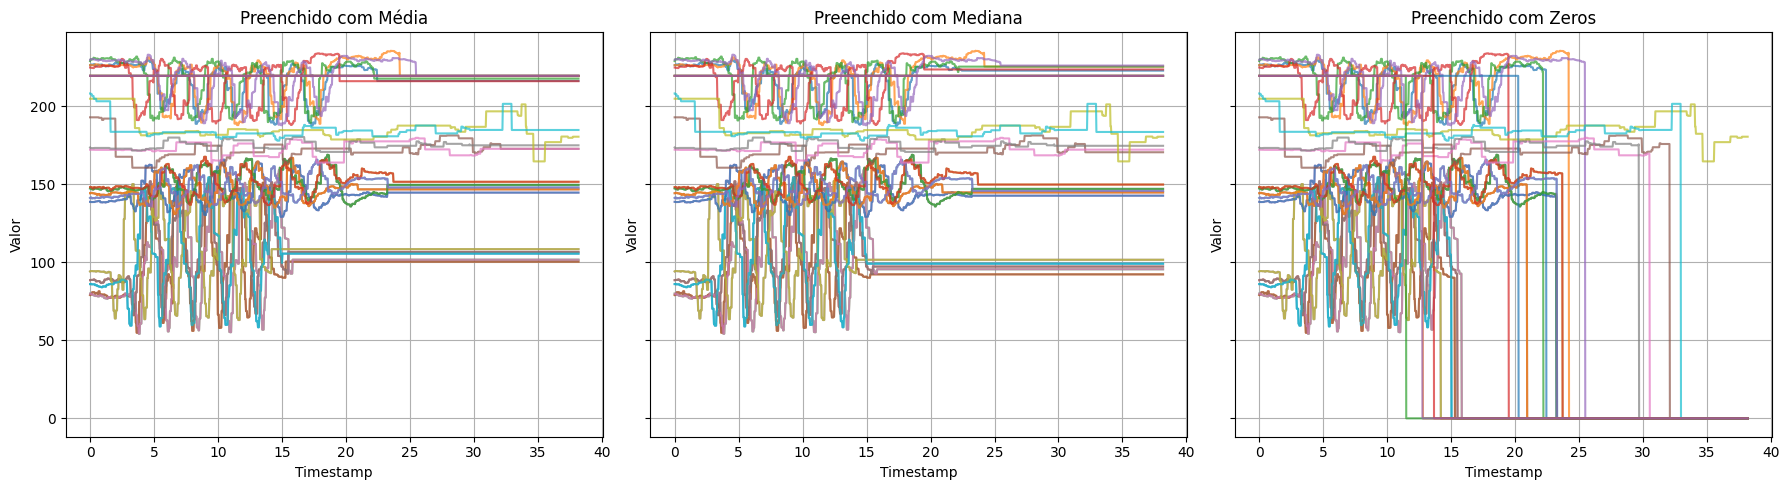

In [6]:
# Função para plotar um dataframe
def plot_series(df, title, ax):
    timestamp = df.iloc[:, 0].values
    series = df.iloc[:, 1:].values

    for s in series.T:  # Transpõe para iterar sobre cada série
        ax.plot(timestamp, s, alpha=0.7)

    ax.set_title(title)
    ax.set_xlabel("Timestamp")
    ax.set_ylabel("Valor")
    ax.grid(True)

# Criar subplots lado a lado
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

plot_series(df_media, "Preenchido com Média", axs[0])
plot_series(df_mediana, "Preenchido com Mediana", axs[1])
plot_series(df_zero, "Preenchido com Zeros", axs[2])

plt.tight_layout()
plt.show()


# Conclusões

Aqui você deve listar todas as conclusões obtidas ao longo do notebook.
Pode copiar todo o conteúdo dessa seção lá na parte de conclusões do cabeçalho.